In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

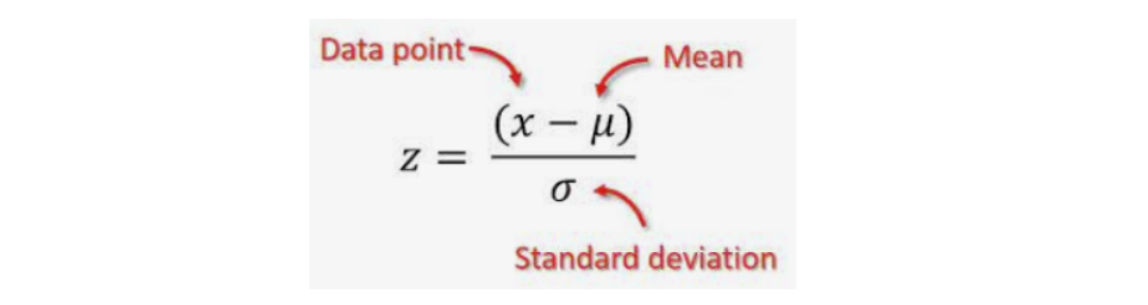

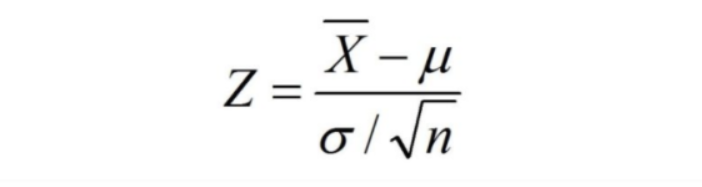

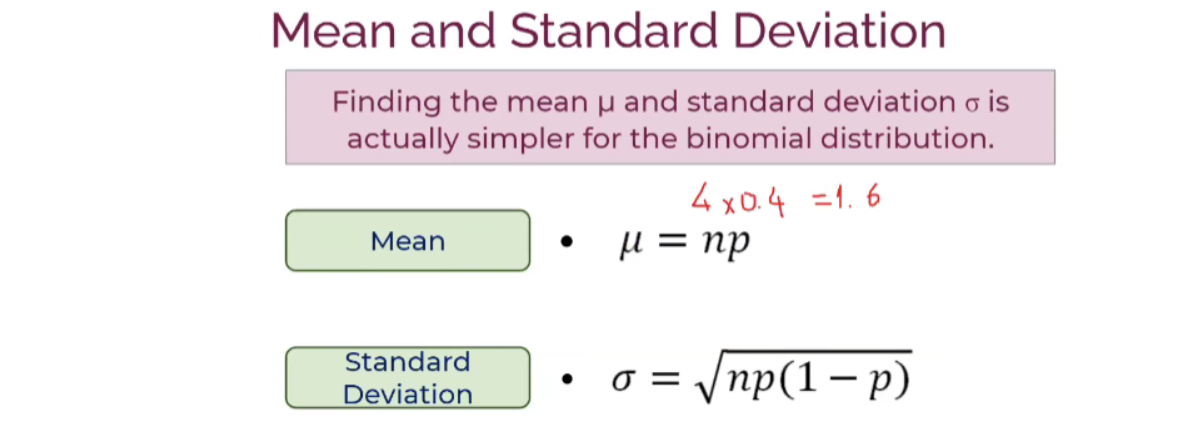

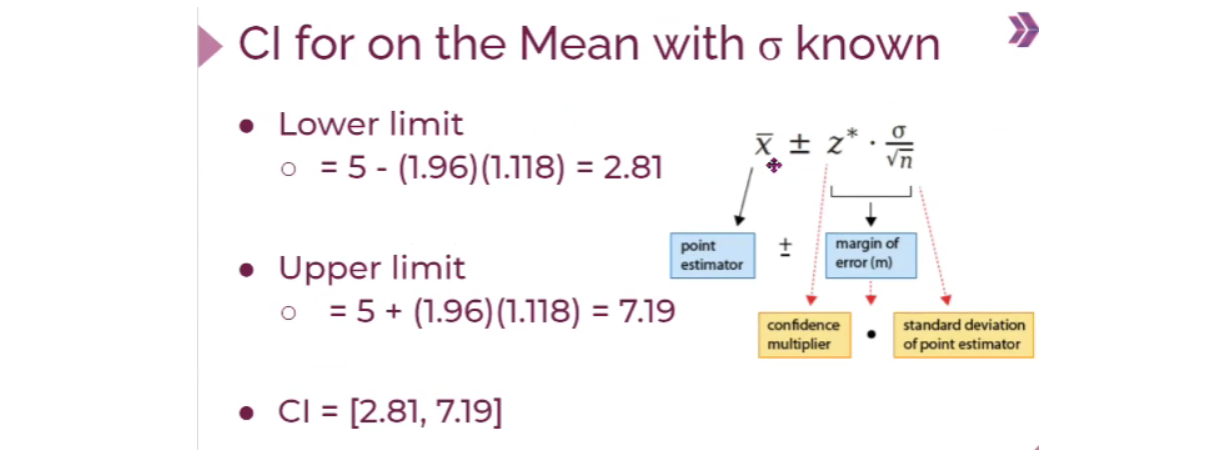

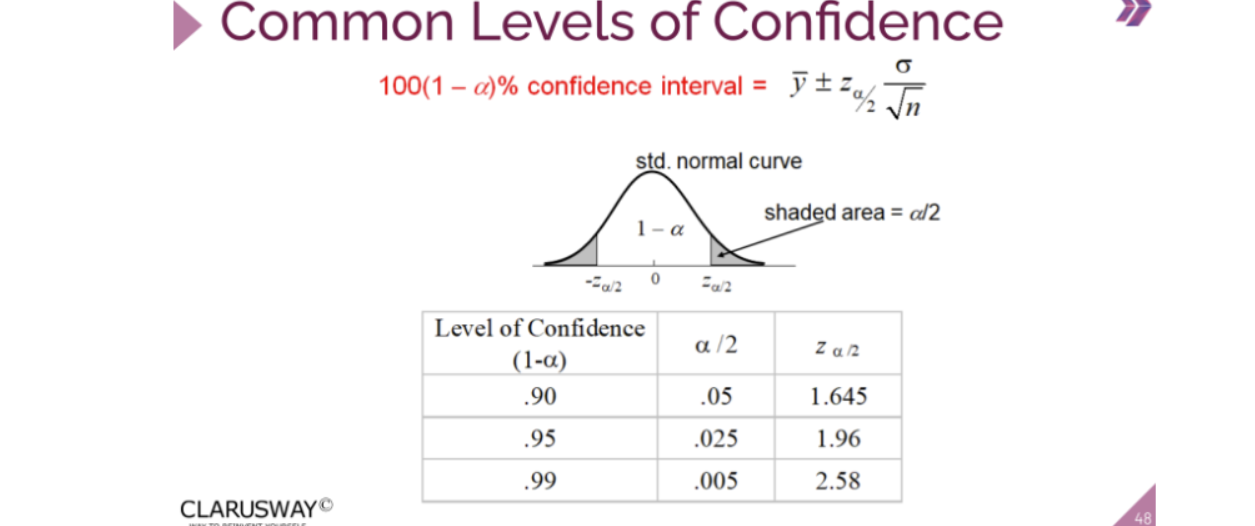

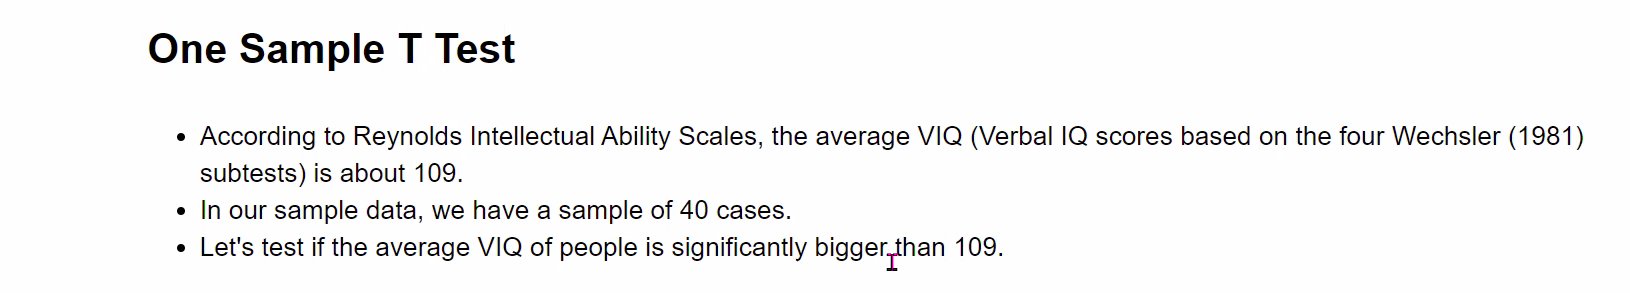

In [25]:
# Brain size and weight and IQ data (Willerman et al. 1991)

df = pd.read_csv("brain_size.csv", sep = ";", na_values = ".", index_col = 0)

In [70]:
df.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
1,Female,133,132,124,118.0,64.5,816932
2,Male,140,150,124,NaN,72.5,1001121
3,Male,139,123,150,143.0,73.3,1038437
4,Male,133,129,128,172.0,68.8,965353
5,Female,137,132,134,147.0,65.0,951545


In [ ]:
# H0: mu0 = 109

# H1: mu0 > 109

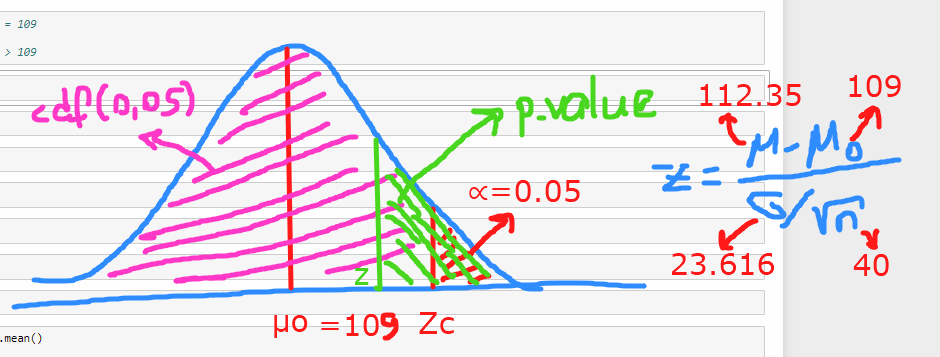

In [26]:
df["VIQ"].mean()

# VIQ ortalaması 109'dan büyük ama bu iddiayı test yapmadan (1sample t test) ortaya atamıyorum. 

112.35

In [27]:
df["VIQ"].std()

23.616107063199742

In [28]:
# t_test = (xbar-mu) / (sigma/kök (n)) 

t_test = (df["VIQ"].mean() - 109) / (df["VIQ"].std() / np.sqrt(df.shape[0]))

In [29]:
t_test   # z skorum

0.8971529586323551

In [23]:
stats.t.cdf(t_test, 39)

0.8124288407074283

In [19]:
1 - stats.t.cdf(t_test, 39)

0.18757115929257173

In [21]:
 # p value  (z skoruma karşılık gelen probability) eğer p value > P(Zc) ise 
    
1-stats.t.cdf(0.89715295863235539, 39) # z skoruna karşılık gelen sağ taraftaki probability alanı

0.18757115929257173

In [39]:
oneSamp=stats.ttest_1samp(df['VIQ'], 109, alternative='greater')  
oneSamp


# default olarak alternative = two sided. bu yüzden biz alternative  = greater yapıyoruz.

# soruda bana ortalama VIQ (significantly)  > 109 ? diye sorduğu için alternative = greater dedik 

Ttest_1sampResult(statistic=0.897152958632355, pvalue=0.1875711592925718)

In [40]:
alpha = 0.05

if oneSamp.pvalue < alpha:
    print("Reject the Null")
else:
    print("Fail to reject")

Fail to reject


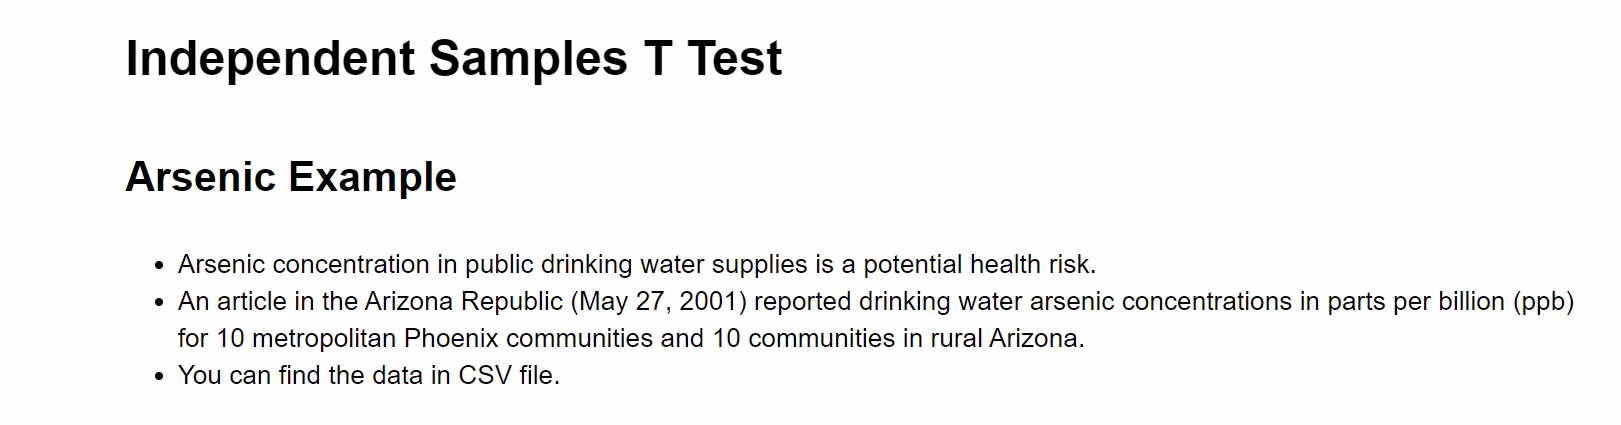

In [30]:
df = pd.read_csv("arsenic.csv")

In [44]:
df.head()

,Metro Phoenix,x1,Rural Arizona,x2
0,Phoenix,3,Rimrock,48
1,Chandler,7,Goodyear,44
2,Gilbert,25,New River,40
3,Glendale,10,Apache Junction,38
4,Mesa,15,Buckeye,33


In [31]:
df["x1"].mean()

12.5

In [32]:
df["x2"].mean()

27.5

In [ ]:
# H0 : mu1 = mu2
# H1 : mu1 != mu2

In [33]:
indTest = stats.ttest_ind(df["x1"], df["x2"])

In [34]:
indTest

Ttest_indResult(statistic=-2.7669395785560553, pvalue=0.012704425122128032)

In [48]:
indTest.statistic

-2.7669395785560553

In [49]:
indTest.pvalue

0.012704425122128032

In [50]:
alpha = 0.05

if indTest.pvalue < alpha:
    print("Reject the Null")
else:
    print("Fail to reject")

Reject the Null


In [51]:
stats.t.ppf(0.025, 18)

# t∝/2 nin cdf'i 0.025 olduğundan ppf(0.025) bana t∝/2 değerini verecektir. (-2.1)

# t∝/2'yi t0 değeri ile kıyaslayarak rejected Null veya fail to reject durumunu belirliyorum.

-2.10092204024096

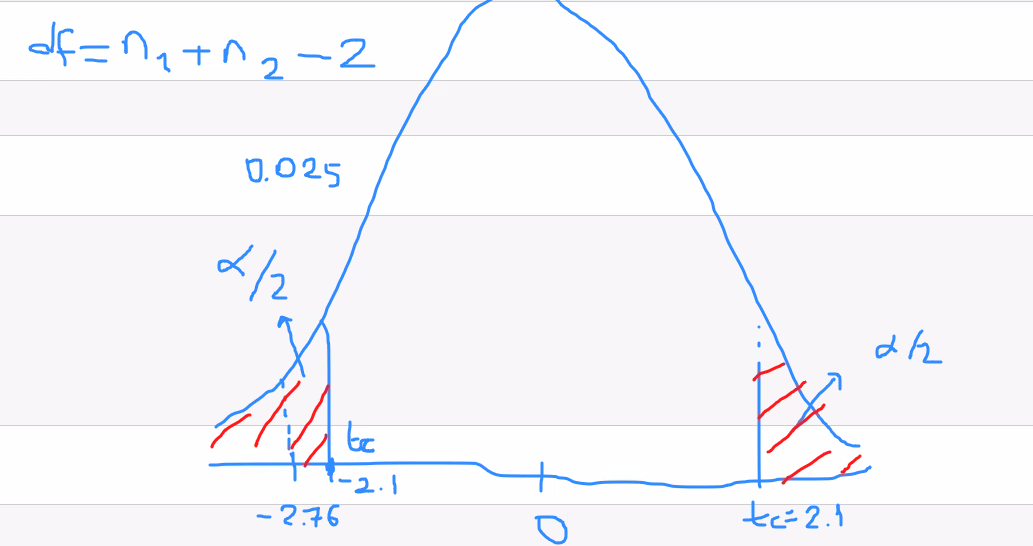

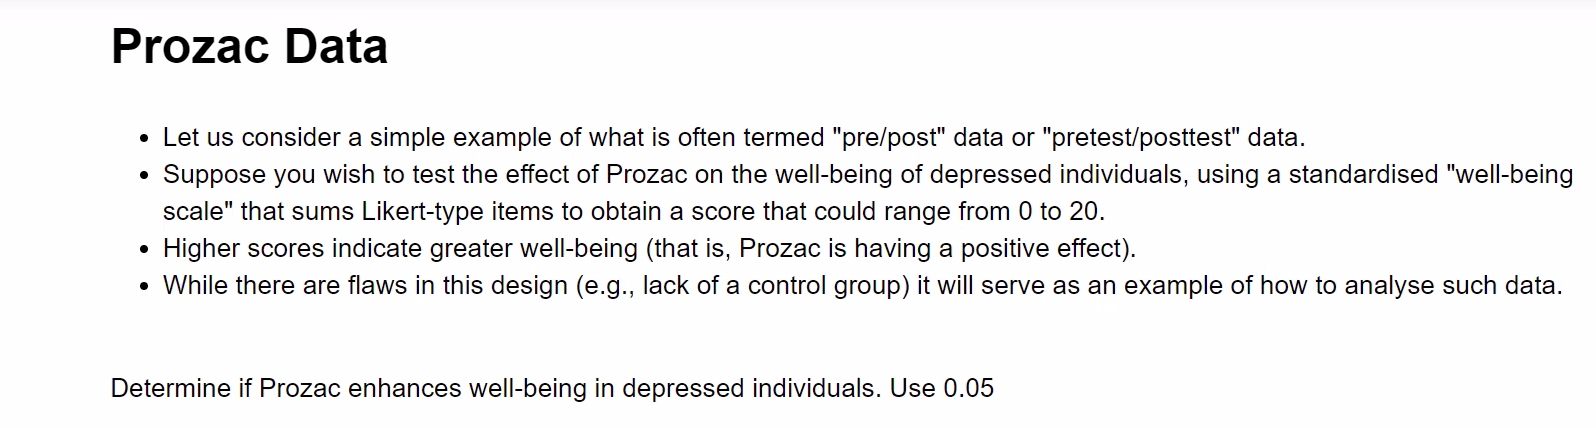

In [35]:
prozac = pd.read_csv("prozac.csv")

In [58]:
prozac.head()

,moodpre,moodpost,difference
0,3,5,2
1,0,1,1
2,6,5,-1
3,7,7,0
4,4,10,6


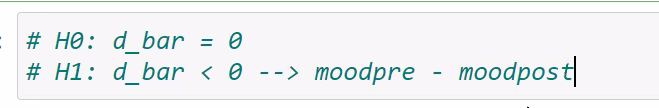

In [36]:
paired = stats.ttest_rel(prozac["moodpre"], prozac["moodpost"], alternative = "less")

# datasetimde son testimden ilk testi çıkartılmıştır ama python fonksiyonunda ilk testten son test çıkartılıyor.

# o zaman  alternative = greater değil less demen lazım. buna dikkat et.

In [37]:
paired

Ttest_relResult(statistic=-3.1428571428571423, pvalue=0.006872912197394246)

In [39]:
stats.ttest_rel(prozac["moodpost"], prozac["moodpre"], alternative = "greater") # alternatif

Ttest_relResult(statistic=3.1428571428571423, pvalue=0.006872912197394246)

In [64]:
paired.pvalue 


0.006872912197394246

In [ ]:
pvalue (0.006872) değerim 1-cdf(t∝) değeri olan 0.025 ten küçük olduğundan Reject the Null

In [65]:
alpha = 0.05

if indTest.pvalue < alpha:
    print("Reject the Null")
else:
    print("Fail to reject")

Reject the Null
